# Polynomial Regression for 3D Data

This notebook aims to fit a polynomial regression model to a 3D dataset and derive an equation that captures the relationship between alpha, theta and J.

## Import Necessary Libraries

We start by importing the libraries essential for data manipulation and modeling.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loading the Data

In this step, we'll load the dataset from a CSV file using the `pandas` library. The dataset consists of three columns: `Theta`, `Alpha`, and `J`

In [12]:
import pandas as pd

# Load data from CSV file
df = pd.read_csv('data/3D_data-tpssh.csv', header=0)

# Separate the values
theta = df['Theta'].values
alpha = df['Alpha'].values
J = df['J'].values

In [13]:
print(df.head())

   Theta  Alpha       J
0   95.2      0 -159.27
1   95.2     10 -128.42
2   95.2     20  -65.70
3   95.2     30    9.06
4   95.2     40   76.49


## Visualizing the data

Visualizing the relationship between `Theta`, `Alpha`, and `J` using a 3D scatter plot.

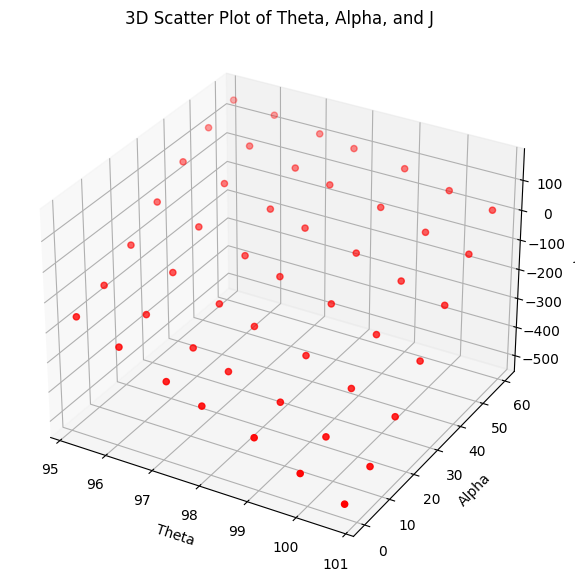

In [14]:
# Visualize the data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta, alpha, J, c='r', marker='o')
ax.set_xlabel('Theta')
ax.set_ylabel('Alpha')
ax.set_zlabel('J')
plt.title("3D Scatter Plot of Theta, Alpha, and J")
plt.show()

## Data Preparation

Separating our dataset into the features (X) and target variable (y).

In [15]:
X = df[['Theta', 'Alpha']]
y = df['J']

## Feature Engineering

To capture the relationship better, we'll create custom polynomial features after visualizing our data, and using intuition about the dependable relationship between `Alpha`, `Theta` and J.

We have to remember that `Alpha`, `Theta` are geometrical parameters that are intimately correlated. Actually, it has been observed that small values of `Theta` are generally associated with large `Alpha`, both favouring the ferromagnetic coupling, and viceversa.

the nature and sign of the exchange coupling constant seem to be mainly affected by the Cu-OH-Cu, `Theta`, and the out-of-plane, `Alpha`, angles:

•	A small value of `Theta` prevents the efficient overlap of the Cu magnetic orbitals with the bridging ligand orbitals. 
•	A large value of `Alpha` tilts the bridging ligand orbitals out of the molecular plane preventing the correct overlap between Cu and bridging ligand orbitals.

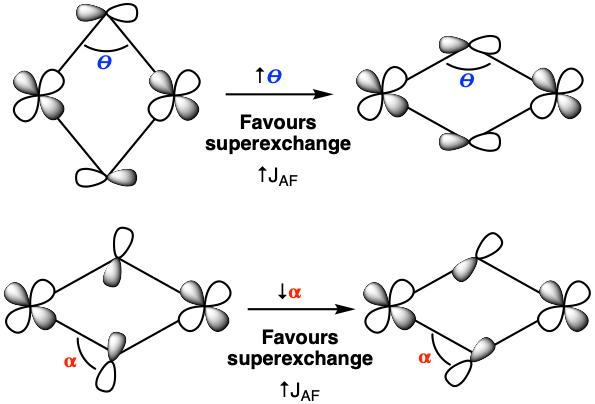

In [16]:
X_custom = pd.DataFrame()
X_custom['X'] = X['Theta']
X_custom['Y'] = X['Alpha']
X_custom['X^2'] = X['Theta'] ** 2
X_custom['X^2*Y'] = X['Theta'] ** 2 * X['Alpha']
X_custom['X^2*Y^2'] = X['Theta'] ** 2 * X['Alpha'] ** 2
X_custom['Y^2'] = X['Alpha'] ** 2
X_custom['X*Y^2'] = X['Theta'] * X['Alpha'] ** 2
X_custom['X*Y'] = X['Theta'] * X['Alpha']

**X and Y**:
- Simply represent `Theta` and `Alpha`. This is the most direct relationship we want to capture, i.e., how `Theta` and `Alpha`, on their own, relate to `J`.

**X^2 and Y^2**:
- These are the squared terms of `Theta` and `Alpha`. By squaring, we're trying to capture any potential non-linear relationships that `Theta` or `Alpha` might have with `J` independently.
- This can help the model understand, for example, if the effect of `Theta` on `J` increases or decreases exponentially as `Theta` changes.

**X*Y**:
- This is an interaction term between `Theta` and `Alpha`. It helps to capture any synergistic or antagonistic effect that occurs when both `Theta` and `Alpha` change.
- In practical terms, this could mean something like: the effect of increasing `Theta` on `J` is different depending on the value of `Alpha` (and vice versa).

**X^2*Y**:
- This term combines the squared effect of `Theta` with `Alpha`. It aims to capture scenarios where the squared effect of `Theta` on `J` is modulated or affected by the value of `Alpha`.

**X^2*Y^2**:
- This term combines the squared effects of both `Theta` and `Alpha`. This is a complex interaction term that tries to account for scenarios where the combined exponential changes in both `Theta` and `Alpha` have a unique effect on `J`.

**X*Y^2**:
- This captures the interaction between `Theta` and the squared effect of `Alpha`. It aims to capture scenarios where the effect of `Theta` on `J` is modulated by the squared value of `Alpha`.


By including these terms, we are allowing the model to explore a wide variety of potential relationships between the predictors (`Theta` and `Alpha`) and the target variable `J`.

In essence, while `Theta` and `Alpha` might individually have certain effects on `J`, their combined (interaction) effects, as well as their nonlinear effects, might provide a more comprehensive understanding of how `J` changes with respect to `Theta` and `Alpha`.


## Model Fitting

We'll now fit our polynomial features to a Linear Regression model.

In [17]:
model = LinearRegression()
model.fit(X_custom, y)

LinearRegression()

## Extracting Model Coefficients

After fitting, let's extract the coefficients of our polynomial equation. These coefficients will allow us to construct an equation representing the relationship.

In [18]:
coefficients = model.coef_
intercept = model.intercept_

## Building the Polynomial Equation

With the coefficients and intercept, we can build our polynomial equation for `J`.

In [19]:
equation = f"J = {intercept:.10f} + {coefficients[0]:.10f} * X + {coefficients[1]:.10f} * Y + "
equation += f"{coefficients[2]:.10f} * X^2 + {coefficients[3]:.10f} * X^2*Y + "
equation += f"{coefficients[4]:.10f} * X^2*Y^2 + {coefficients[5]:.10f} * Y^2 + "
equation += f"{coefficients[6]:.10f} * X*Y^2 + {coefficients[7]:.10f} * X*Y"

print(equation)

J = 7498.5893663009 + -97.8261709408 * X + -74.8697514292 * Y + 0.1807431182 * X^2 + -0.0063908009 * X^2*Y + -0.0003704683 * X^2*Y^2 + -4.2194914164 * Y^2 + 0.0794858425 * X*Y^2 + 1.4614280743 * X*Y


## Conclusion

The derived polynomial equation provides a mathematical representation of the relationship in our 3D dataset. This equation will be next used to extract alpha from a set of experimental values of J and theta to <b>test its model prediction<b>.